In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import skimage 
from skimage import io, filters

In [4]:
fname = "/Users/timrudge/RaspiScope/Timelapse060117/image_%04d.jpg"
#fname = "/Users/timrudge/RaspiScope/timelapse/timlap_3_%04d.jpg"
fname%(0)

'/Users/timrudge/RaspiScope/Timelapse060117/image_0000.jpg'

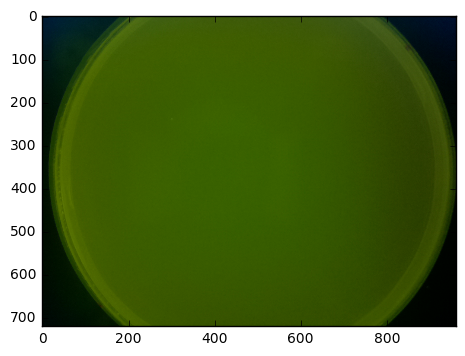

In [5]:
im = plt.imread(fname%0)
plt.imshow(im)

In [8]:
im.shape
w,h,_ = im.shape

In [9]:
nt = 420
ims = np.zeros((w,h,nt))
for i in range(nt):
    im = plt.imread(fname%i)
    ims[:,:,i] = im[:,:,1]

In [10]:
ims.shape

(720, 960, 420)

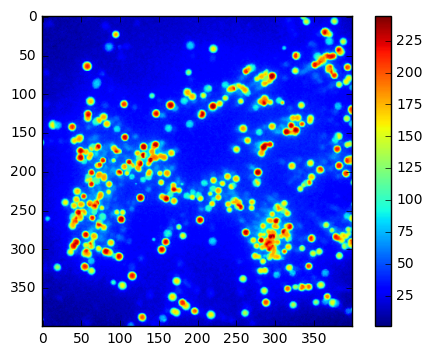

In [86]:
plt.imshow(ims[:,:,-1])
plt.colorbar()
imssub = ims[200:600,200:600,:]
plt.imshow(imssub[:,:,-1])

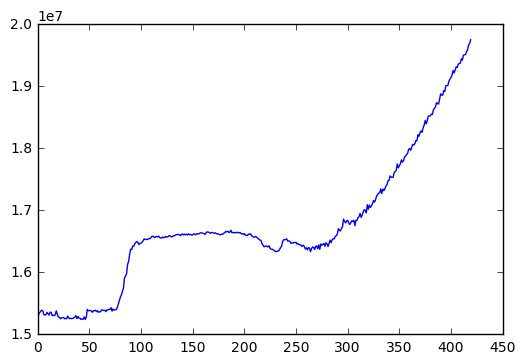

In [87]:
sumims = imssub.sum(axis=(0,1))
sumims.shape
plt.plot(sumims)

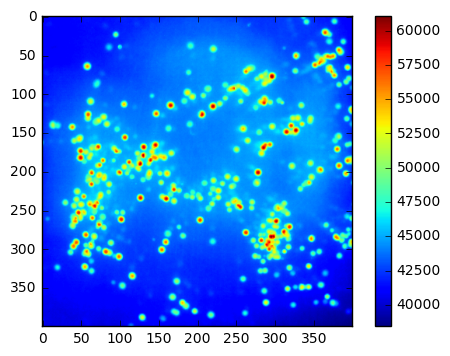

In [88]:
ims_sum = imssub.sum(axis=2)
plt.imshow(ims_sum)
plt.colorbar()

In [89]:
from skimage.filters import gaussian
simsub = gaussian(ims_sum, 2)
nsimsub = (simsub-simsub.min())/(simsub.max()-simsub.min())

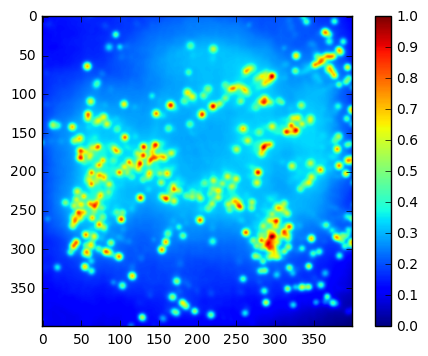

In [90]:
plt.imshow(nsimsub)
plt.colorbar()

In [152]:
import skimage.feature as skfeat
A = skfeat.blob_log(nsimsub, min_sigma=1.0, max_sigma=10.0, num_sigma=100, threshold=0.25, overlap=0.8)

In [153]:
A.shape
#A[1:10,:]

(18, 3)

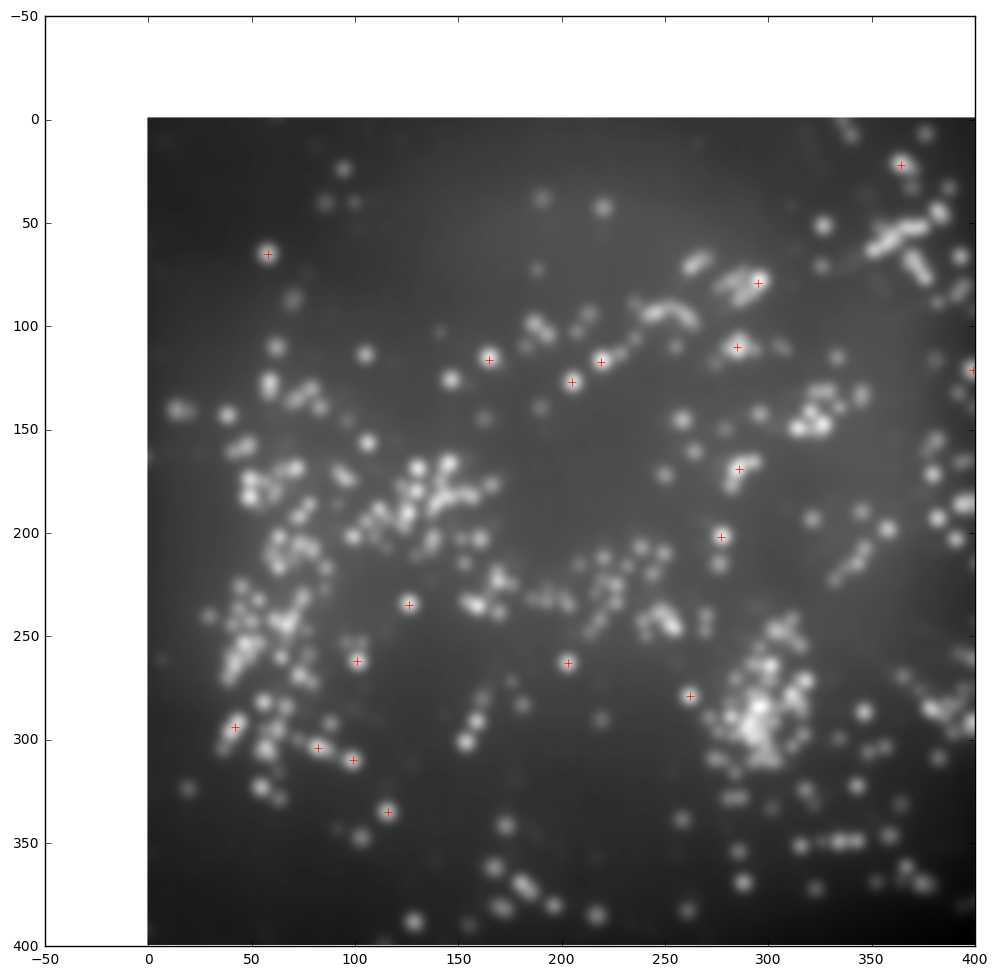

In [154]:
plt.figure(figsize=(16,12))
plt.imshow(nsimsub, cmap='gray')
plt.hold(True)
for i in range(len(A)):
    plt.plot(A[i,1],A[i,0],'r+')

/Users/timrudge/miniconda/envs/raspiscope/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(335.0, 116.0, 6.7272727272727275)

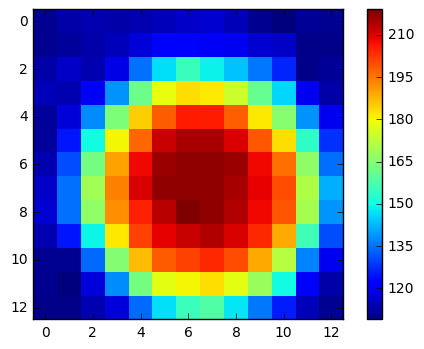

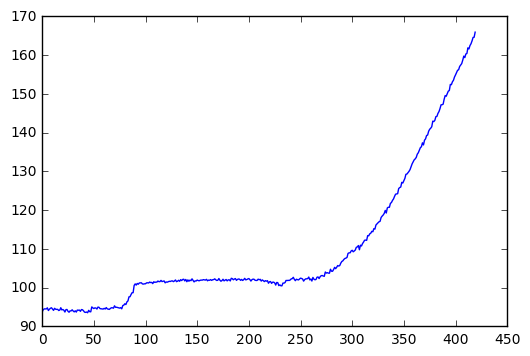

In [176]:
i=17
x = A[i,0]
y = A[i,1]
r = 2*A[i,2]
roi = imssub[x-r:x+r,y-r:y+r,:]
plt.imshow(roi[:,:,400], interpolation='none')
plt.colorbar()
plt.figure()
plt.plot(roi.mean(axis=(0,1)))
x,y,r

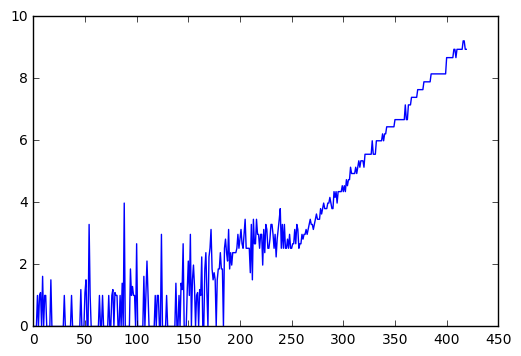

In [177]:
R = np.zeros((420,))
for i in range(420):
    roi200 = roi[:,:,i].astype(np.float32)
    nroi200 = (roi200-roi200.min())/(roi200.max()-roi200.min())
    AA = skfeat.blob_log(nroi200, min_sigma=1.0, max_sigma=10.0, num_sigma=200, threshold=0.25, overlap=0.8)
    if len(AA)>0:
        R[i] = AA[0,2]
'''
print AA
plt.imshow(roi200, interpolation='none')
plt.figure()
plt.plot(roi200[7,:])
'''
plt.plot(R*R)

/Users/timrudge/miniconda/envs/raspiscope/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


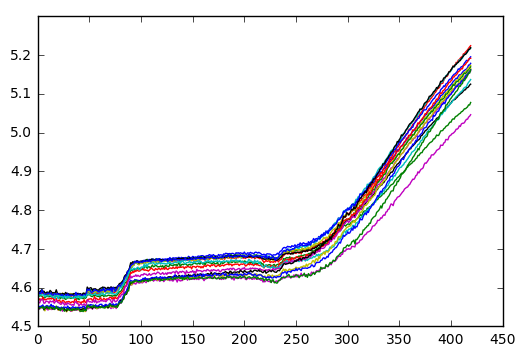

In [131]:
for i in range(2,len(A)):
    x = A[i,0]
    y = A[i,1]
    r = 2*A[i,2]
    roi = imssub[x-r:x+r,y-r:y+r,:]
    plt.plot(np.log(roi.mean(axis=(0,1))))
    plt.hold(True)
plt.legend()

In [ ]:
plt.plot(ims[500,200,:])

In [ ]:
plt.figure(figsize=(16,12))
plt.imshow(ims[A[10,0],400:450,:])

In [ ]:
s = np.diff(ims[A[10,0],:,:], axis=1)
s.shape

In [ ]:
c=np.cov(s)
x = A[10,0]
y = A[10,1]
plt.plot(c[y,y-20:y+20])
c[y,y]